# About Wine
Wine is an alcoholic drink typically made from fermented grapes. Yeast consumes the sugar in the grapes and converts it to ethanol, carbon dioxide, and heat.

White wine is primarily made with white grapes, and the skins are separated from the juice before the fermentation process. Red wine is made with darker red or black grapes, and the skins remain on the grapes during the fermentation process.


---


# Objective
“Wine is bottled poetry.” The wine connoisseurs in a wine factory in Portugal are debating on the quality of red and white wines. They thought to take the help of Data Science industry for this work. They hired you as a data scientist as you were the best data scientist in the world. Can you help them out?


---


# Evaluation Criteria
Submissions are evaluated using **Accuracy Score**. How do we do it? 

Once you generate and submit the target variable predictions on evaluation dataset, your submissions will be compared with the true values of the target variable. 

The True or Actual values of the target variable are hidden on the DPhi Practice platform so that we can evaluate your model's performance on unseen data. Finally, an **Accuracy score** for your model will be generated and displayed

# About the dataset
The dataset is about white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests. The dataset is related to white variant of the Portuguese "Vinho Verde" wine.

The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

---

# Data Description
Input variables (based on physicochemical tests):

* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol Output variable (based on sensory data)

Target
* quality (score between 0 and 10)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load and Visualize Data

In [79]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/Training_set_whitewine.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/Testing_set_whitewine.csv')

In [80]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.2,0.47,0.19,8.3,0.029,24.0,142.0,0.99200,3.22,0.45,12.3,6
1,6.8,0.38,0.29,9.9,0.037,40.0,146.0,0.99326,3.11,0.37,11.5,6
2,7.9,0.17,0.32,1.6,0.053,47.0,150.0,0.99480,3.29,0.76,9.6,6
3,7.6,0.30,0.27,10.6,0.039,31.0,119.0,0.99815,3.27,0.30,9.3,6
4,5.8,0.24,0.39,1.5,0.054,37.0,158.0,0.99320,3.21,0.52,9.3,6


In [81]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3423,8.0,0.25,0.13,17.2,0.036,49.0,219.0,0.99960,2.96,0.46,9.70,5
3424,6.1,0.16,0.34,6.1,0.034,31.0,114.0,0.99365,3.32,0.58,10.15,7
3425,6.0,0.24,0.33,2.5,0.026,31.0,85.0,0.99014,3.13,0.50,11.30,7
3426,6.5,0.22,0.45,8.0,0.053,52.0,196.0,0.99590,3.23,0.48,9.10,6
3427,7.8,0.26,0.49,3.2,0.027,28.0,87.0,0.99190,3.03,0.32,11.30,7


In [82]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000
mean,6.860385,0.277195,0.333740,6.419793,0.045606,35.467620,138.991978,0.994050,3.188868,0.490907,10.503727,5.878063
std,0.829501,0.099555,0.118688,4.989139,0.020889,16.644776,42.605887,0.002919,0.151140,0.113922,1.233363,0.886140
min,4.200000,0.080000,0.000000,0.600000,0.014000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,24.000000,108.000000,0.991730,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.300000,0.043000,34.000000,135.000000,0.993800,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,10.000000,0.050000,46.000000,168.000000,0.996200,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,31.600000,0.346000,138.500000,366.500000,1.010300,3.820000,1.080000,14.200000,9.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3428 non-null   float64
 1   volatile acidity      3428 non-null   float64
 2   citric acid           3428 non-null   float64
 3   residual sugar        3428 non-null   float64
 4   chlorides             3428 non-null   float64
 5   free sulfur dioxide   3428 non-null   float64
 6   total sulfur dioxide  3428 non-null   float64
 7   density               3428 non-null   float64
 8   pH                    3428 non-null   float64
 9   sulphates             3428 non-null   float64
 10  alcohol               3428 non-null   float64
 11  quality               3428 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 321.5 KB


In [84]:
df.quality.value_counts()

6    1538
5    1020
7     616
8     122
4     114
3      14
9       4
Name: quality, dtype: int64

In [85]:
print(f'Total good wine: {len(df[df.quality >= 6])}')
print(f'Total bad wine: {len(df[df.quality < 6])}')

Total good wine: 2280
Total bad wine: 1148


In [86]:
# sns.pairplot(df, hue='quality', palette='bright')

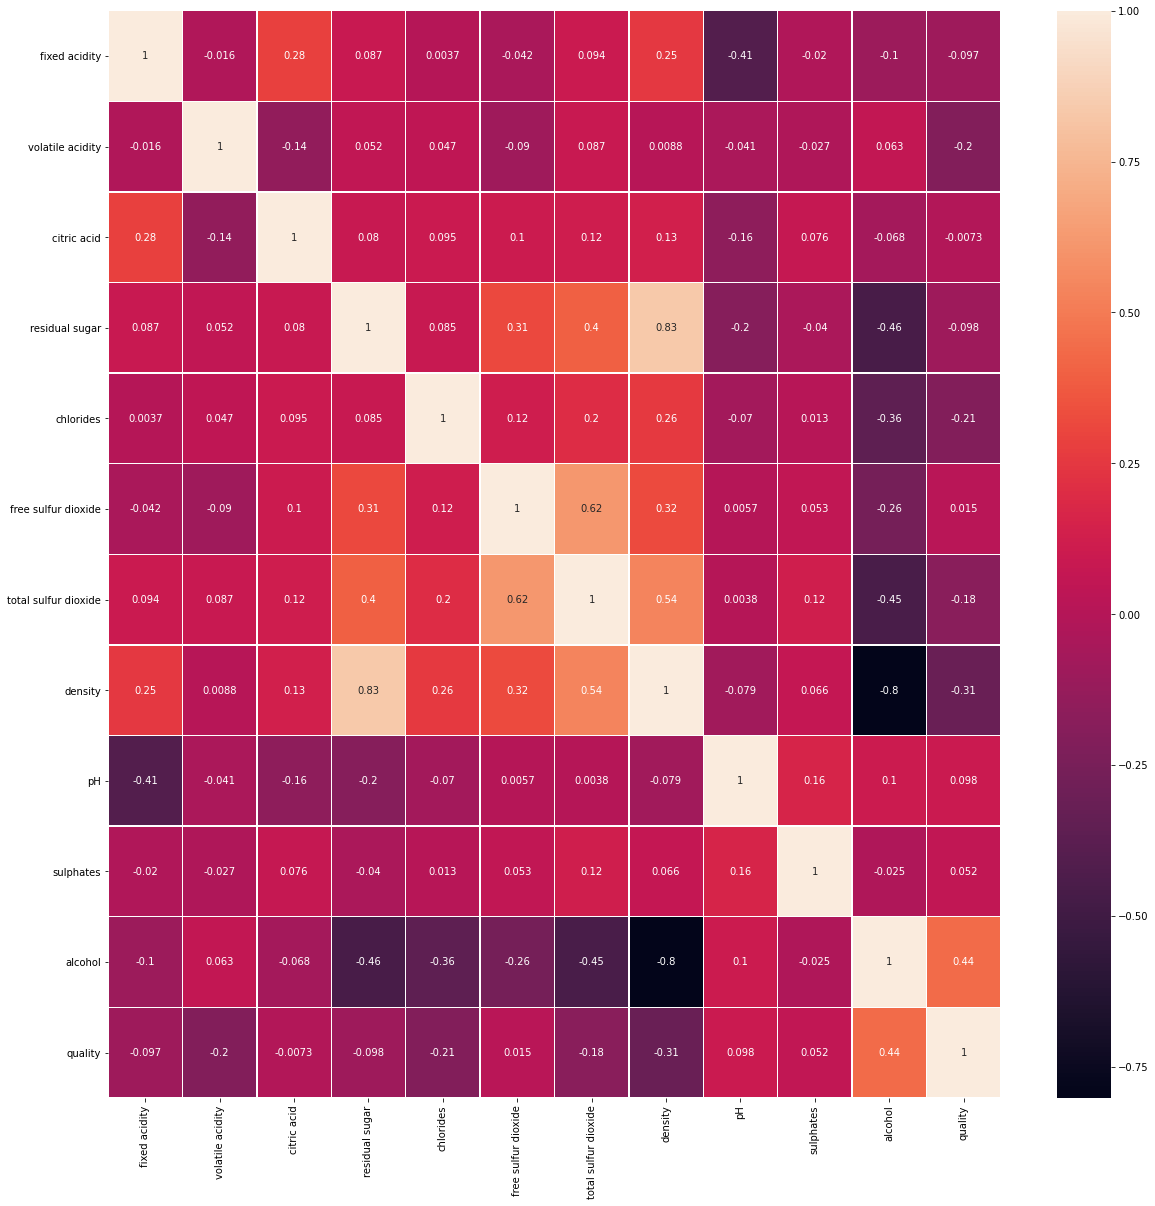

In [87]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

#### Summary

* Seems 'density' and 'alcohol' have strong correlation -0.8
* 'density' and 'residual sugar' have strong correlation 0.83
* imbalance target class
* no missing values
* some outliers

### Preprocess Data

Train / Validation Split

In [89]:
X = df.drop(['quality'], axis=1)
y = df.quality

In [90]:
X.shape

(2558, 11)

In [91]:
y.shape

(2558,)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2)

In [94]:
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (2046, 11)
X_val shape: (512, 11)
y_train shape: (2046,)
y_val shape: (512,)


Scale Data

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [98]:
X_test_scaled = scaler.transform(X_test)

Feature Importance

In [99]:
from sklearn.linear_model import LassoCV

In [100]:
lassoCV = LassoCV()
lassoCV.fit(X_train_scaled, y_train)
print(f'Best alpha: {lassoCV.alpha_}')
print(f'Best score: {lassoCV.score(X_train_scaled, y_train)}')

Best alpha: 3.154407866714473e-05
Best score: 0.1963402005200573


In [101]:
lasso_coef = pd.Series(lassoCV.coef_, index = X_train.columns)
lasso_coef

fixed acidity           0.180209
volatile acidity       -0.863562
citric acid            -0.052513
residual sugar          0.854395
chlorides              -0.195272
free sulfur dioxide     0.282719
total sulfur dioxide   -0.283429
density                -0.896014
pH                      0.262048
sulphates               0.258472
alcohol                 0.713525
dtype: float64

In [102]:
print(f'Lasso picked {sum(lasso_coef != 0)} variables and eliminated the other {sum(lasso_coef == 0)} variables')

Lasso picked 11 variables and eliminated the other 0 variables


In [103]:
imp_lasso_coef = lasso_coef.sort_values()

Text(0.5, 1.0, 'Feature Importance using Lasso Model')

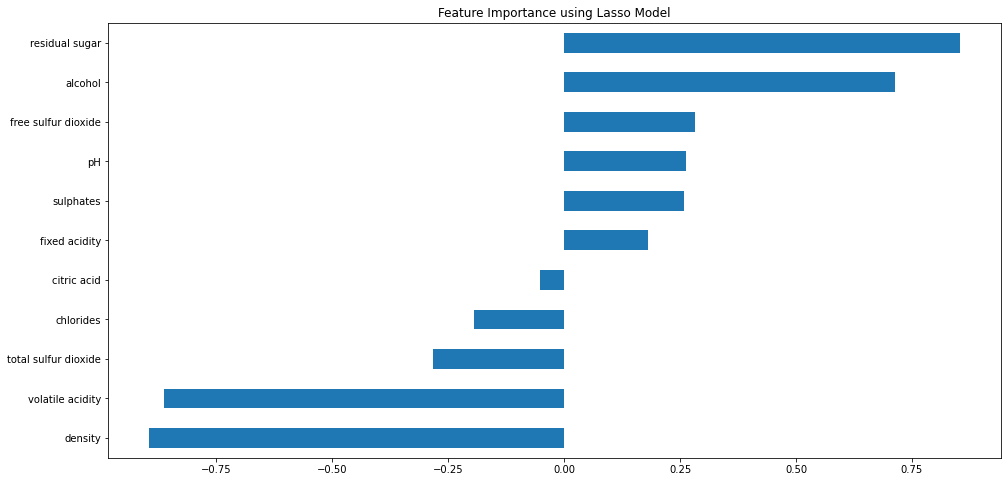

In [104]:
plt.figure(figsize=(16, 8))
imp_lasso_coef.plot(kind='barh')
plt.title('Feature Importance using Lasso Model')

* 'chlorides' from lasso model could be dropped
* 'citric acid' although not 0 seems to make have very little value importance
* 'total sulfur dioxide' have little value importance

In [105]:
# try to remove 'chlorides' first, if bad try remove 'citric acid' too, if still bad try to remove 'total sulfur dioxide' too
col_to_drop = []
# col_to_drop = ['chlorides']
# col_to_drop = ['chlorides', 'citric acid']
# col_to_drop = ['chlorides', 'citric acid', 'total sulfur dioxide']
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.drop(col_to_drop, axis=1))
X_val = scaler.transform(X_val.drop(col_to_drop, axis=1))
X_test = scaler.transform(X_test.drop(col_to_drop, axis=1))

In [106]:
X_train.shape

(2046, 11)



---



Anomaly Detection

In [107]:
from sklearn.ensemble import IsolationForest

Single Column anomaly detection

In [108]:
isolationForest = IsolationForest()

In [109]:
isolationForest.fit(np.array(y_train).reshape(-1, 1))

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [110]:
y_label = np.arange(0, 10).reshape(-1, 1)
anomaly_score = isolationForest.decision_function(y_label)
outlier = isolationForest.predict(y_label)

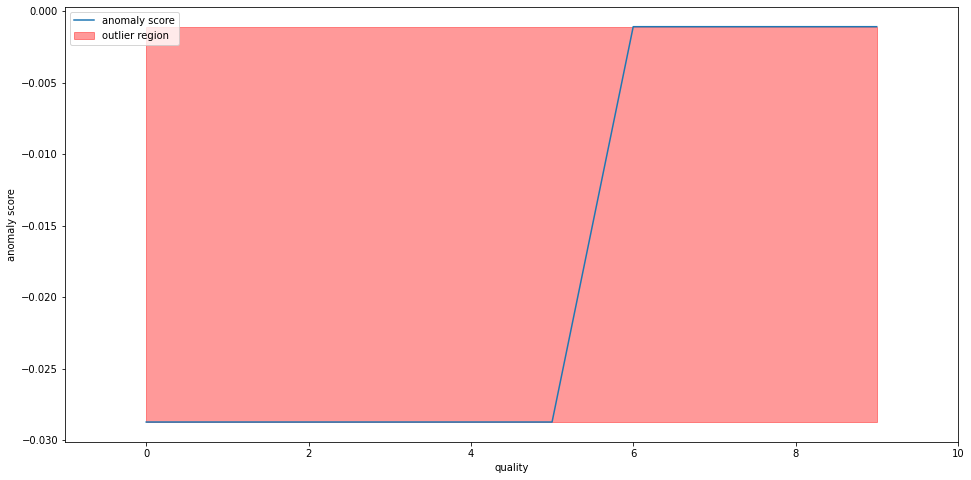

In [111]:
plt.figure(figsize=(16, 8))
plt.plot(y_label, anomaly_score, label='anomaly score')
plt.fill_between(y_label.T[0], np.min(anomaly_score), np.max(anomaly_score), where=outlier==-1, color='r', alpha=0.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('quality')
plt.xlim([-1, 10])
plt.show()

* Quality < 4 and > 7 is outlier

In [112]:
# y_train[y_train > 7] = 7
# y_train[y_train < 4] = 4
# y_train = y_train - 4

# y_val[y_val > 7] = 7
# y_val[y_val < 4] = 4
# y_val = y_val - 4

# print(f'y_train unique: {set(y_train)}')
# print(f'y_val unique: {set(y_val)}')
# K = len(set(y_train))

In [113]:
K = 10

## Autoencoder Model

### Data Preparation

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [188]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import Accuracy, AUC, Precision, Recall
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [189]:
df_5 = df[df['quality'] == 5]
df_6 = df[df['quality'] == 6]
df_7 = df[df['quality'] == 7]

X_5 = df_5.drop(['quality'], axis = 1).values
X_6 = df_6.drop(['quality'], axis = 1).values
X_7 = df_7.drop(['quality'], axis = 1).values

# y_5 = X_5.copy()
# y_6 = X_6.copy()
# y_7 = X_7.copy()

In [190]:
def train_test_splitter(X, train_size_p=75):
    N = len(X) * train_size_p // 100
    return X[:N], X[N:], X[:N], X[N:]

In [191]:
X_5_train, X_5_val, y_5_train, y_5_val = train_test_splitter(X_5)
X_6_train, X_6_val, y_6_train, y_6_val = train_test_splitter(X_6)
X_7_train, X_7_val, y_7_train, y_7_val = train_test_splitter(X_7)

In [192]:
from sklearn.preprocessing import StandardScaler

In [216]:
def scaling_data(X_train, X_valid, X_test, y_train, y_valid, y_test):
    scl = StandardScaler()
    X_train = scl.fit_transform(X_train)
    X_valid = scl.transform(X_valid)
    X_test = scl.transform(X_test)

    y_train = scl.transform(y_train)
    y_valid = scl.transform(y_valid)
    y_test = scl.transform(X_test)
    return scl, X_train, X_valid, X_test, y_train, y_valid, y_test

In [217]:
scl_5, X_5_train, X_5_val, X_5_test, y_5_train, y_5_val, y_5_test = scaling_data(X_5_train, X_5_val, X_test, y_5_train, y_5_val, X_test)
scl_6, X_6_train, X_6_val, X_6_test, y_6_train, y_6_val, y_6_test = scaling_data(X_6_train, X_6_val, X_test, y_6_train, y_6_val, X_test)
scl_7, X_7_train, X_7_val, X_7_test, y_7_train, y_7_val, y_7_test = scaling_data(X_7_train, X_7_val, X_test, y_7_train, y_7_val, X_test)

### Model Train

In [199]:
def build_model(X_train):
    i = Input(shape=(X_train.shape[1],))
    x = Dense(128, activation='relu')(i)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(X_train.shape[1])(x)

    m = Model(i, x)
    m.summary()
    return m

In [200]:
m_5 = build_model(X_5_train)
m_6 = build_model(X_6_train)
m_7 = build_model(X_7_train)

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               1536      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_28 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_29 (Dense)             (None, 11)              

In [201]:
callback_early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [202]:
m_5.compile(loss='mean_squared_error', optimizer='adam')
m_6.compile(loss='mean_squared_error', optimizer='adam')
m_7.compile(loss='mean_squared_error', optimizer='adam')

In [203]:
r_5 = m_5.fit(X_5_train, y_5_train, epochs=1000, validation_data=(X_5_val, y_5_val), callbacks=[callback_early_stopping])

Epoch 1/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.8434 - val_loss: 0.6553
Epoch 2/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.3926 - val_loss: 0.2744
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1788 - val_loss: 0.1268
Epoch 4/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0898 - val_loss: 0.0777
Epoch 5/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0557 - val_loss: 0.0440
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.0299
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.0212
Epoch 8/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.0211
Epoch 9/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0159
Epoch 10/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0126 - val_loss: 0.0140

In [204]:
r_6 = m_6.fit(X_6_train, y_6_train, epochs=1000, validation_data=(X_6_val, y_6_val), callbacks=[callback_early_stopping])

Epoch 1/1000
37/37 [==============================] - 0s 5ms/step - loss: 0.8065 - val_loss: 0.5620
Epoch 2/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.3081 - val_loss: 0.1570
Epoch 3/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1003 - val_loss: 0.0752
Epoch 4/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.0484 - val_loss: 0.0515
Epoch 5/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 0.0302
Epoch 6/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.0199 - val_loss: 0.0214
Epoch 7/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.0163
Epoch 8/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0173
Epoch 9/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.0143
Epoch 10/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0164

In [205]:
r_7 = m_7.fit(X_7_train, y_7_train, epochs=1000, validation_data=(X_7_val, y_7_val), callbacks=[callback_early_stopping])

Epoch 1/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.9412 - val_loss: 0.7980
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6835 - val_loss: 0.5368
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4163 - val_loss: 0.3010
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2177 - val_loss: 0.1784
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1294 - val_loss: 0.1158
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0808 - val_loss: 0.0765
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0581 - val_loss: 0.0620
Epoch 8/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0445 - val_loss: 0.0484
Epoch 9/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0331 - val_loss: 0.0434
Epoch 10/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0251 - val_loss: 0.0294

In [224]:
ms = [m_5, m_6, m_7]
rs = [r_5, r_6, r_7]
scls = [scl_5, scl_6, scl_7]

### Evaluation

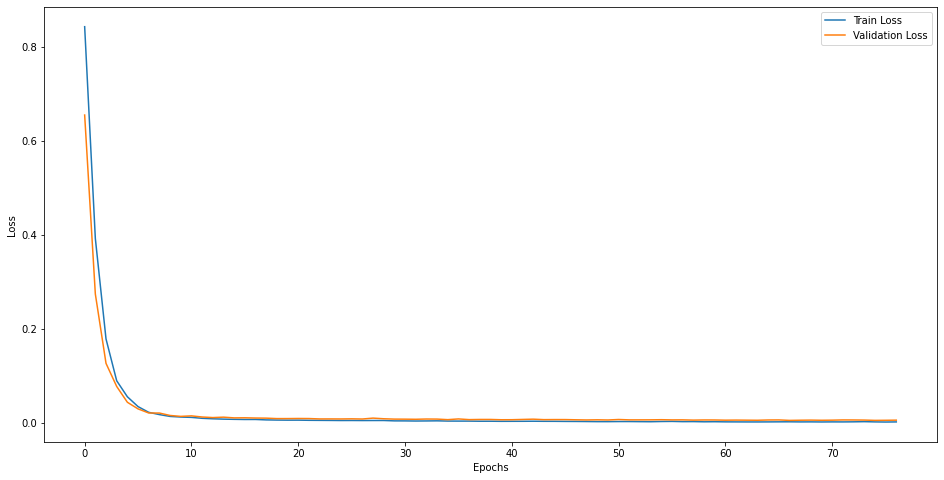

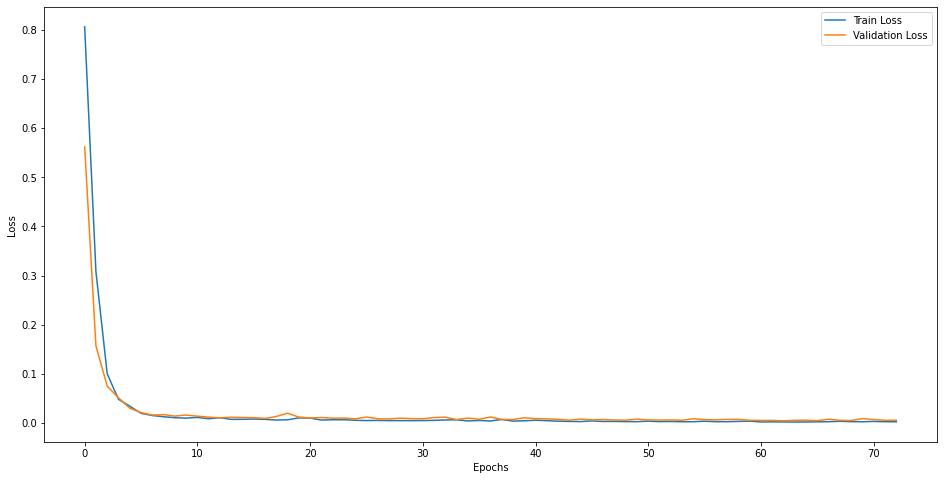

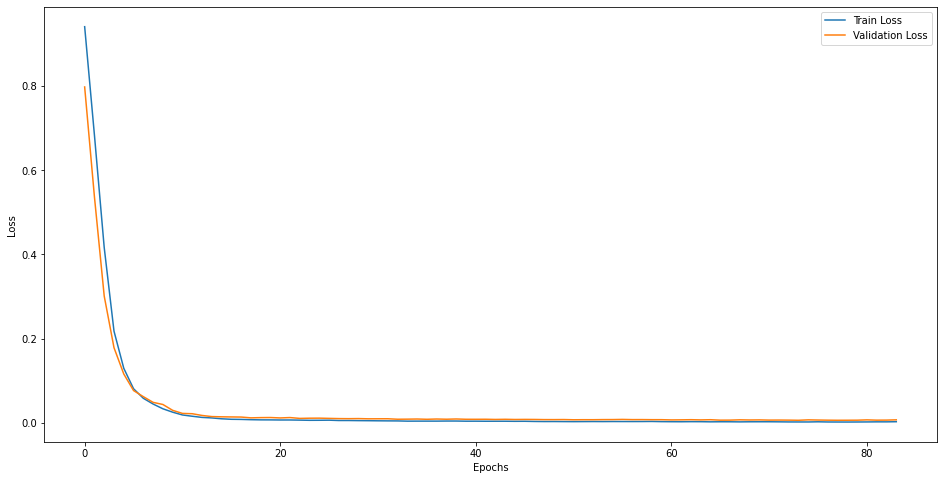

In [207]:
for r in rs:    
    plt.figure(figsize=(16, 8))
    plt.plot(r.history['loss'], label='Train Loss')
    plt.plot(r.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [208]:
from sklearn.metrics import mean_squared_error

In [248]:
def check_predictions(models, scls, Xs, start=5):
    for j in range(len(models)):
        print(f'Using Autoencoder Model Wine Quality {j+5}')
        for i in range(len(Xs)):
            y_pred = models[j].predict(scls[j].transform(Xs[i]))
            print(f'MSE of wine quality {i+start} using model {j+5}: {mean_squared_error(Xs[i], y_pred):.5f}')
        print(100*'-')

In [249]:
X_3 = df[df.quality == 3].drop(['quality'], axis=1).values
X_4 = df[df.quality == 4].drop(['quality'], axis=1).values
X_8 = df[df.quality == 8].drop(['quality'], axis=1).values
X_9 = df[df.quality == 9].drop(['quality'], axis=1).values

X_others = df[(df.quality < 5) | (df.quality > 7)].drop(['quality'], axis=1).values

In [250]:
check_predictions(ms, scls, [X_3, X_4, X_5_val, X_6_val, X_7_val, X_8, X_9], start=3)

Using Autoencoder Model Wine Quality 5
MSE of wine quality 3 using model 5: 51.14292
MSE of wine quality 4 using model 5: 32.42796
MSE of wine quality 5 using model 5: 0.00594
MSE of wine quality 6 using model 5: 0.00893
MSE of wine quality 7 using model 5: 0.01021
MSE of wine quality 8 using model 5: 24.43072
MSE of wine quality 9 using model 5: 15.76182
----------------------------------------------------------------------------------------------------
Using Autoencoder Model Wine Quality 6
MSE of wine quality 3 using model 6: 53.92267
MSE of wine quality 4 using model 6: 34.59217
MSE of wine quality 5 using model 6: 0.00694
MSE of wine quality 6 using model 6: 0.00596
MSE of wine quality 7 using model 6: 0.00673
MSE of wine quality 8 using model 6: 31.55936
MSE of wine quality 9 using model 6: 21.67088
----------------------------------------------------------------------------------------------------
Using Autoencoder Model Wine Quality 7
MSE of wine quality 3 using model 7: 82.941

### Predictions

In [299]:
def make_predictions(ms, scls, X_test, threshold=1):
    y_test_pred_mse = np.zeros((len(X_test), len(ms)))
    X_test_list = [scls[i].transform(X_test) for i in range(len(scls))]

    for i in range(len(X_test)):
        y_test_pred_mse[i] = [
            mean_squared_error(X_test_list[0][i].reshape(1, -1), ms[0].predict(X_test_list[0][i].reshape(1, -1))),
            mean_squared_error(X_test_list[1][i].reshape(1, -1), ms[1].predict(X_test_list[1][i].reshape(1, -1))),
            mean_squared_error(X_test_list[2][i].reshape(1, -1), ms[2].predict(X_test_list[2][i].reshape(1, -1)))
        ]
    
    return np.array(y_test_pred_mse)

In [294]:
y_test_pred_mse = make_predictions(ms, scls, X_test)

In [295]:
y_test_pred_mse

array([[0.00160975, 0.0026592 , 0.00471674],
       [0.00247834, 0.00249336, 0.00514185],
       [0.00229143, 0.00229039, 0.00376345],
       ...,
       [0.00147424, 0.00275671, 0.00456596],
       [0.00199354, 0.00269145, 0.00383537],
       [0.00125898, 0.00237388, 0.00356427]])

In [296]:
y_test_pred_mse.shape

(1470, 3)

In [302]:
worst_quality = 5
threshold = 1

In [308]:
y_test_pred = np.array([y_test_pred_mse[i].argmin()+worst_quality if np.amin(y_test_pred_mse[i]) <= threshold else np.random.choice([4, 8]) for i in range(len(y_test_pred_mse)) ])
y_test_pred

array([5, 5, 6, ..., 5, 5, 5])

### Save Predictions

In [309]:
pred_df = pd.DataFrame({
    'prediction': y_test_pred
})
pred_df.to_csv('wwq_pred.csv', index=False)

from google.colab import files
files.download('wwq_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## NN Model

### Model Train

In [114]:
i = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(i)
x = Dense(128, activation='relu')(x)
x = Dense(K, activation='softmax')(x)

In [115]:
model = Model(i, x)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 19,338
Trainable params: 19,338
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [117]:
r = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200)

Epoch 1/200
64/64 [==============================] - 0s 3ms/step - loss: 1.1705 - accuracy: 0.5709 - val_loss: 0.6462 - val_accuracy: 0.6016
Epoch 2/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6461 - val_loss: 0.6228 - val_accuracy: 0.6523
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.6740 - val_loss: 0.5838 - val_accuracy: 0.6973
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.7023 - val_loss: 0.5806 - val_accuracy: 0.6953
Epoch 5/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.6999 - val_loss: 0.5824 - val_accuracy: 0.6875
Epoch 6/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7097 - val_loss: 0.6272 - val_accuracy: 0.6602
Epoch 7/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7160 - val_loss: 0.5834 - val_accuracy: 0.6895
Epoch 8/200
6

### Model Evaluation

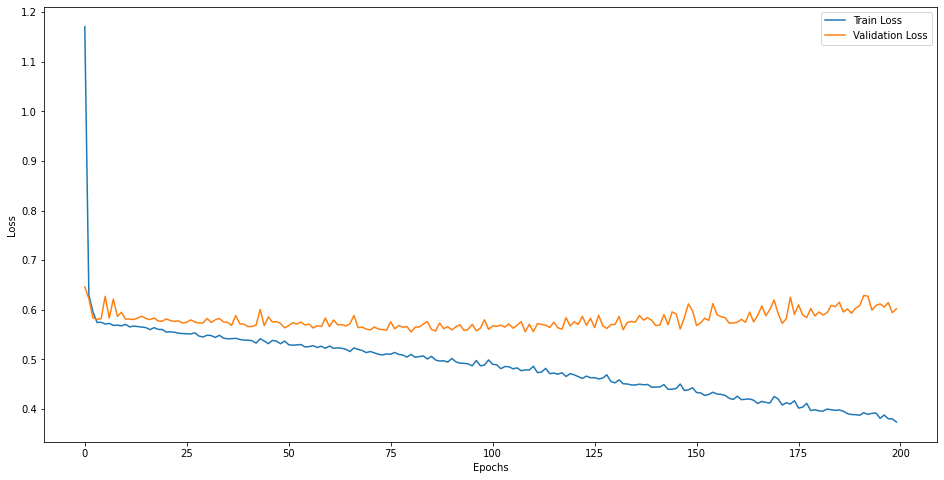

In [118]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

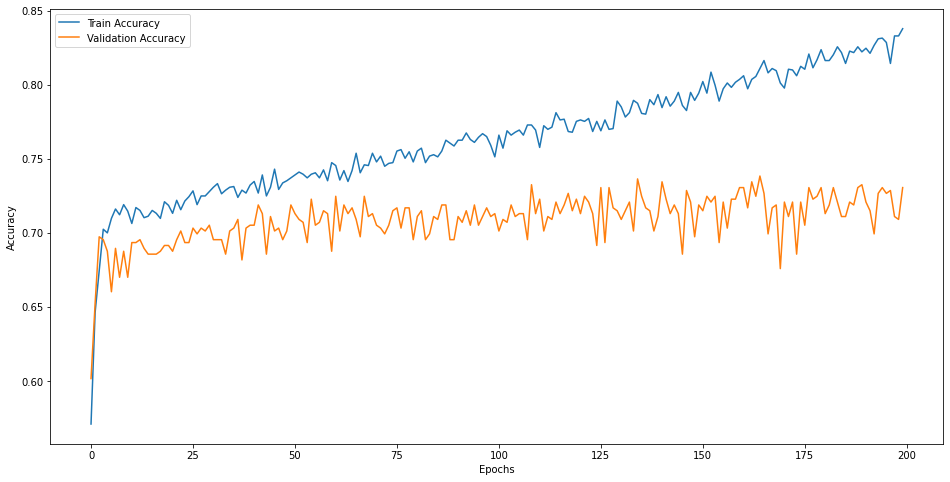

In [119]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [120]:
y_val_pred = model.predict(X_val).argmax(axis=1)

In [121]:
from sklearn.metrics import confusion_matrix, classification_report

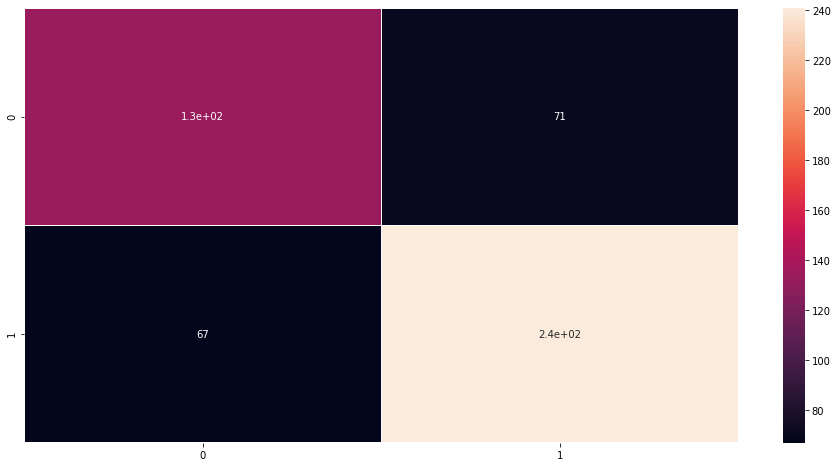

In [122]:
plt.figure(figsize=(16, 8))
sns.heatmap(confusion_matrix(y_val, y_val_pred), linewidths=0.5, annot=True)
plt.show()

In [123]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           5       0.67      0.65      0.66       204
           6       0.77      0.78      0.78       308

    accuracy                           0.73       512
   macro avg       0.72      0.72      0.72       512
weighted avg       0.73      0.73      0.73       512



## Cross Validation and Hyperparameter Tuning

In [124]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [125]:
# set the parameters for grid search
dt_param = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2,3],
              "max_depth": [None, 2, 3],
              "min_samples_leaf": [1, 5],
              "max_leaf_nodes": [None],
              }

svc_param = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [126]:
dt = DecisionTreeClassifier()
svc = SVC()

Decision Tree

In [127]:
# Decision Tree
model_dt = GridSearchCV(dt, dt_param, cv=5)
model_dt.fit(X_train, y_train)
y_val_pred_gsdt = model_dt.predict(X_val)

In [128]:
scores_dt = cross_val_score(model_dt, X_train, y_train, cv=5)
y_pred_dt = cross_val_predict(model_dt, X_train, y_train, cv=5)
print(f'Mean accuracy dt: {scores_dt.mean()}')

Mean accuracy dt: 0.6989265907329


In [129]:
print('Decision Tree')
print(classification_report(y_val, y_val_pred_gsdt))

Decision Tree
              precision    recall  f1-score   support

           5       0.57      0.63      0.60       204
           6       0.74      0.69      0.71       308

    accuracy                           0.67       512
   macro avg       0.66      0.66      0.66       512
weighted avg       0.67      0.67      0.67       512



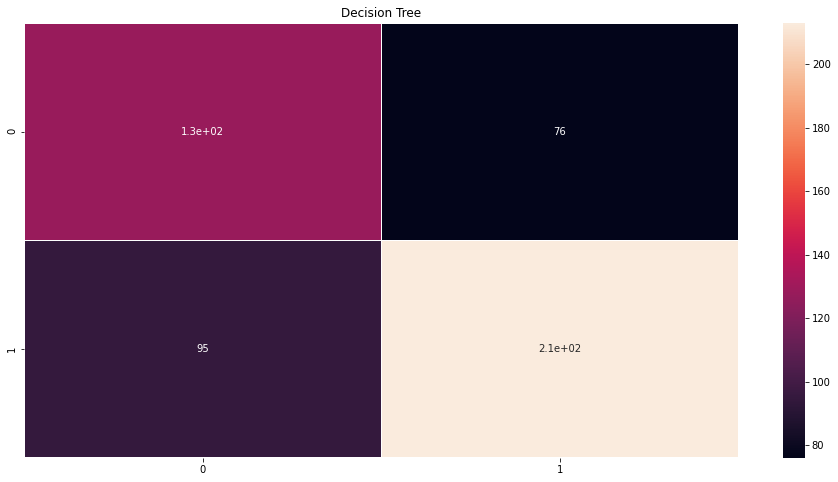

In [130]:
plt.figure(figsize=(16, 8))
sns.heatmap(confusion_matrix(y_val, y_val_pred_gsdt), linewidths=0.5, annot=True)
plt.title('Decision Tree')
plt.show()

SVC

In [131]:
# SVC
model_svc = GridSearchCV(svc, svc_param, cv=5)
model_svc.fit(X_train, y_train)
y_val_pred_gssvc = model_svc.predict(X_val)

In [132]:
# scores_svc = cross_val_score(model_svc, X_train, y_train, cv=5)
# y_pred_svc = cross_val_predict(model_svc, X_train, y_train, cv=5)
# print(f'Mean accuracy svc: {scores_svc.mean()}')

In [133]:
print('SVC')
print(classification_report(y_val, y_val_pred_gssvc))

SVC
              precision    recall  f1-score   support

           5       0.61      0.53      0.57       204
           6       0.71      0.77      0.74       308

    accuracy                           0.68       512
   macro avg       0.66      0.65      0.66       512
weighted avg       0.67      0.68      0.67       512



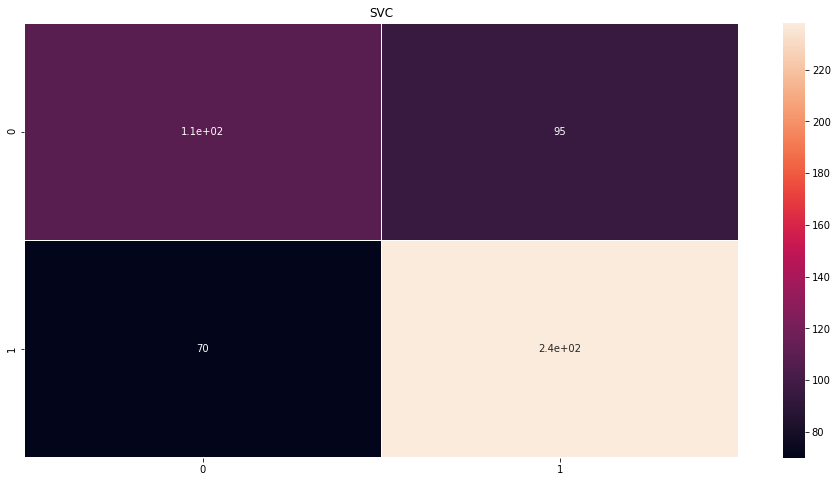

In [134]:
plt.figure(figsize=(16, 8))
sns.heatmap(confusion_matrix(y_val, y_val_pred_gssvc), linewidths=0.5, annot=True)
plt.title('SVC')
plt.show()

### Predictions

In [ ]:
def make_predictions(model, X_test):
    y_pred = model.predict(X_test).argmax(axis=1)
    return y_pred